In [80]:
import sys

import torch
from matplotlib import pyplot as plt

from pointnet.sh import get_spherical_harmonics_element, clear_spherical_harmonics_cache

def sh_img(l,m,res):
    x = torch.arange(0, 1, 1 / res) * torch.pi
    y = torch.arange(0, 1, 1 / res) * torch.pi * 2
    coords = torch.stack(torch.meshgrid(x, y, indexing="ij"), dim=-1).reshape(-1, 2)

    clear_spherical_harmonics_cache()
    sh = get_spherical_harmonics_element(l, m, coords[:,0], coords[:,1])
    sh = (sh.clip(-1, 1) + 1) / 2
    return sh.reshape(res,res)

s_small = 32
s_large = 256
img_32 = sh_img(4,3,s_small)
img_256 = sh_img(4,3,s_large)

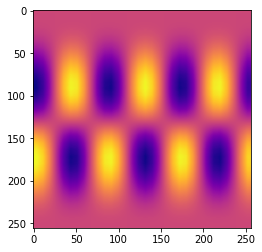

In [120]:
factor = s_large//s_small
upscaled = torch.nn.functional.interpolate(img_32.reshape(1,1,s_small,s_small), scale_factor=factor, mode='bilinear').reshape(s_large,s_large)
plt.imshow(upscaled,cmap="plasma")

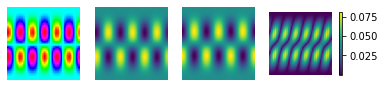

In [116]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax1.imshow(img_32,cmap="hsv")
ax1.set_axis_off()

ax2.imshow(upscaled)
ax2.set_axis_off()

ax3.imshow(img_256)
ax3.set_axis_off()

ec = ax4.imshow((upscaled-img_256).abs())
ax4.set_axis_off()

divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(ec, cax=cax)


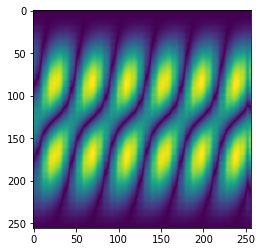

In [112]:
ec = plt.imshow((upscaled-img_256).abs(),cmap="")
plt.colorbar(ec, cax=cax)


In [111]:
torch.ones(10,3).mean(0)

tensor([1., 1., 1.])